In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os
import os.path
import shutil


trait_name = 'attractive'
sub_folder_prefix = ''

if sub_folder_prefix == '':
    gt_rating_name = '../../preparation_data/amt_gt_validation/' + trait_name + '_stim_lst.csv'
elif sub_folder_prefix == 'modifae_':
    gt_rating_name = '../../preparation_data/amt_modifAE_single_rating/' + trait_name + '_stim_lst.csv'
else:
    gt_rating_name = '../../preparation_data/amt_modifae_new_single/' + trait_name + '_stim_lst.csv'

sub_folder_name = sub_folder_prefix + trait_name
likert_csv = './' + sub_folder_name + '/likert_data.csv'
likert_data = pd.read_csv(likert_csv)

sub_num_dict = {}
sub_counter = 1
for sub_id in likert_data['subId']:
    if sub_id not in sub_num_dict:
        sub_num_dict[sub_id] = sub_counter
        sub_counter += 1

likert_data['subNum'] = likert_data['subId'].map(sub_num_dict)

img_num_dict = {}
img_counter = 0
for img_name in likert_data['imgName']:
    if img_name not in img_num_dict:
        img_num_dict[img_name] = img_counter
        img_counter += 1

likert_data['imgNum'] = likert_data['imgName'].map(img_num_dict)

likert_data = likert_data.sort_values(by=['subNum', 'imgNum'], ascending=True)

likert_data = likert_data[['subNum', 'imgNum', 'rating', 'rt', 'imgName', 'subId']]
likert_data['rating'] = likert_data['rating'].astype(np.float64)

In [2]:
likert_data.shape

(1500, 6)

In [5]:
sub_num = 1
one_sub = likert_data[likert_data['subNum']==1]

# todo 1
plot the histogram. 


In [7]:
# df.hist(bins=3)
one_sub.head()

,subNum,imgNum,rating,rt,imgName,subId
0,1,0,8.0,5913,054808.jpg,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB
1,1,1,4.0,12492,100138.jpg,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB
39,1,1,8.0,4365,100138.jpg,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB
2,1,2,2.0,5218,144010.jpg,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB
3,1,3,9.0,5540,059217.jpg,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB


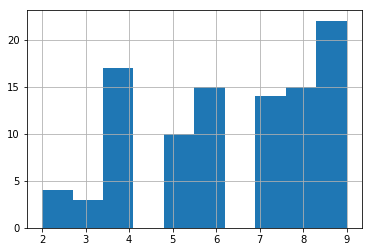

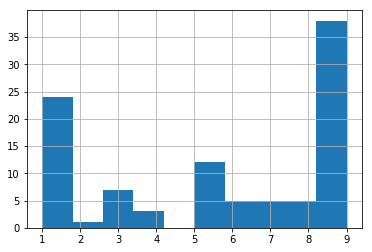

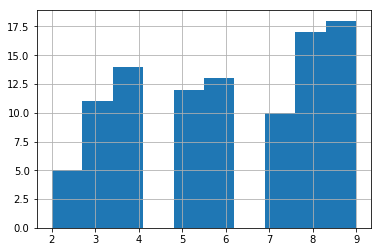

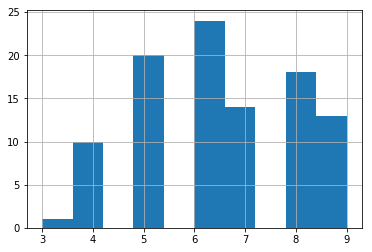

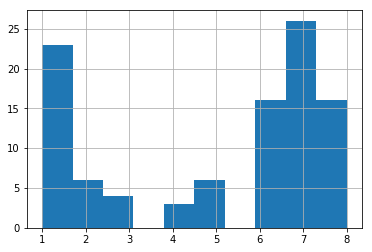

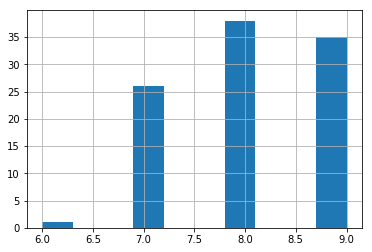

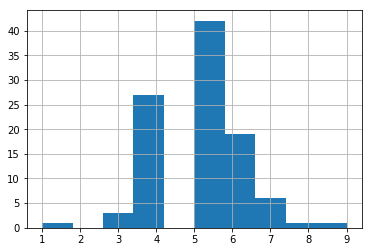

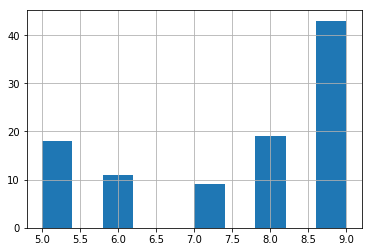

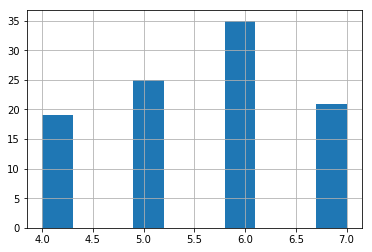

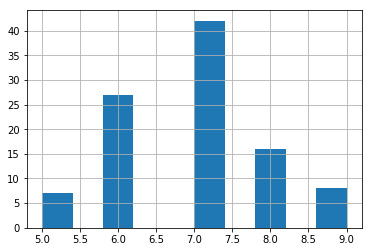

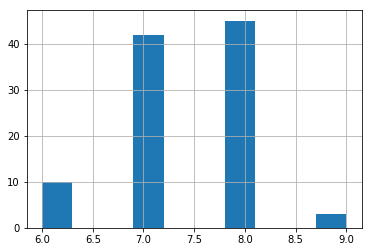

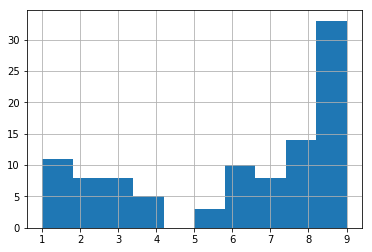

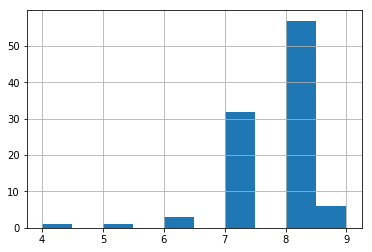

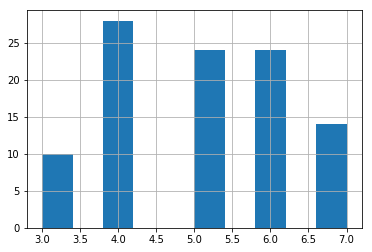

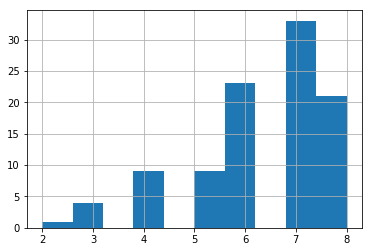

In [12]:
%matplotlib inline
for sub_num in range(1, likert_data['subNum'].nunique()+1):
    one_sub = likert_data[likert_data['subNum']==sub_num]
    one_sub['rating'].hist()
    plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


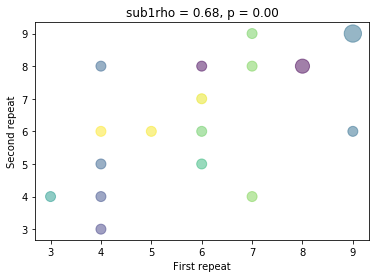

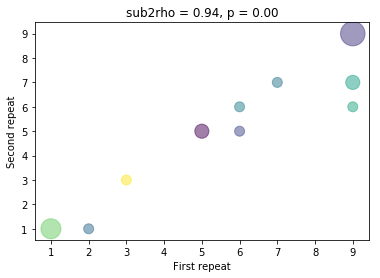

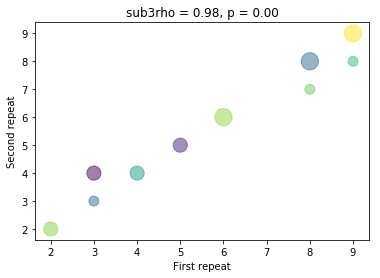

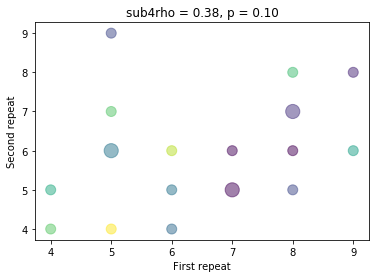

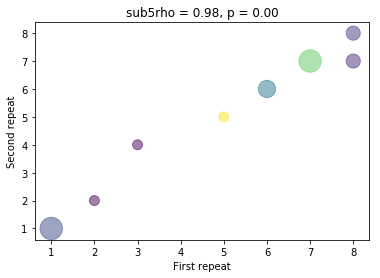

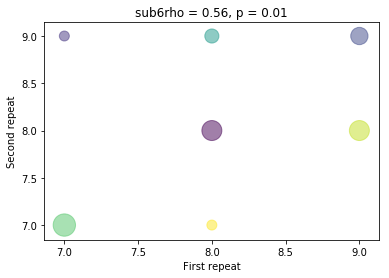

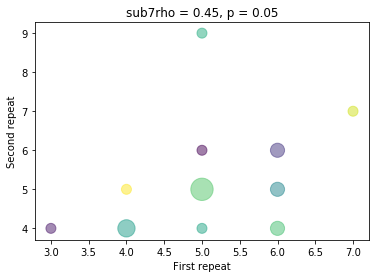

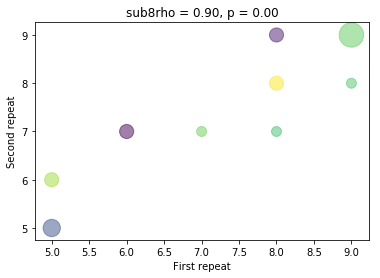

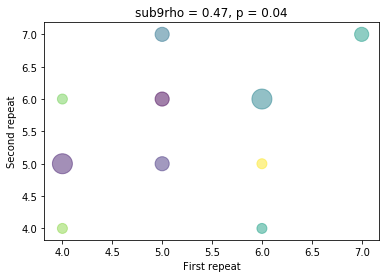

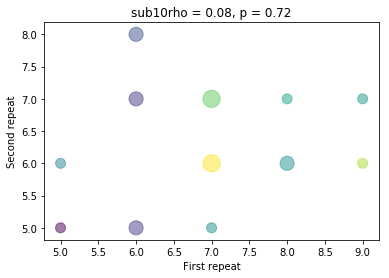

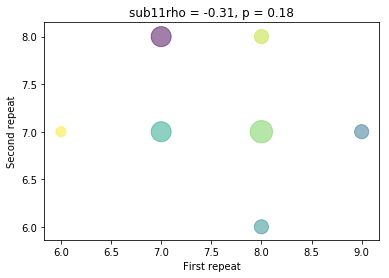

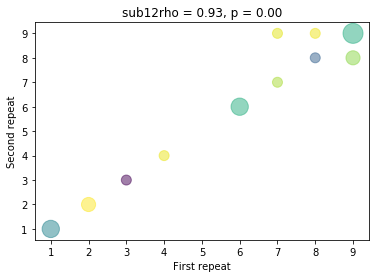

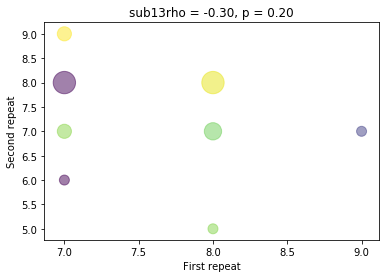

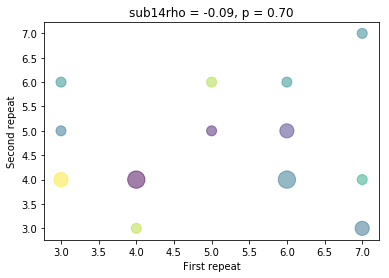

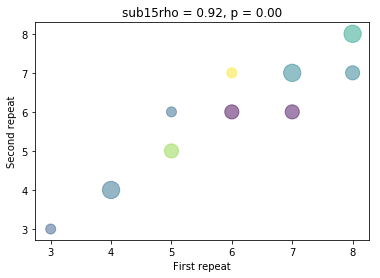

In [16]:
rho_lst = []
p_lst = []
plot_or_not = True
for sub_num in range(1, likert_data['subNum'].nunique()+1):
    cur_sub_data = likert_data[likert_data['subNum']==sub_num]
    cur_sub_data['freq'] = cur_sub_data.groupby('imgNum')['imgNum'].transform('count')
    num_rating_used = cur_sub_data['rating'].nunique()


    repeat_lst = cur_sub_data[cur_sub_data['freq']==2]
    p = repeat_lst.sort_values(by=['imgNum'])
    p1 = p[::2]
    p2 = p[1::2]

    first_half = p1['rating'].values
    second_half = p2['rating'].values
    rho, p = spearmanr(first_half, second_half)
    if num_rating_used < 3:
        print sub_num, trait_name, task_word, num_rating_used, rho
    else:
        rho_lst.append(rho)
        p_lst.append(p)

    if plot_or_not:
        unique_coor = sorted(set(zip(first_half, second_half)))
        total_coor = list(zip(first_half, second_half))

        size = []

        for coor in unique_coor:
            size.append(total_coor.count(coor))

        x_unique_coor, y_unique_coor = zip(*unique_coor)

        colors = np.random.rand(len(x_unique_coor))

        plt.title('sub' + str(sub_num)+'rho = {:.2f}, p = {:.2f}'.format(rho, p))
        plt.xlabel('First repeat')
        plt.ylabel('Second repeat')
        plt.scatter(x_unique_coor, y_unique_coor, s=np.array(size)*100, alpha=0.5, c=colors)
        plt.show()
